In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib.ticker as ticker

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import os

Mounted at /content/gdrive


# Carregar arquivos e montar série histórica a partir de epws

In [4]:
os.chdir("/content/gdrive/My Drive/Pesquisa/1 Artigos em desenvolvimento/2025_11_swc_heatwave_detection_vs_NBR15575/1 Desenvolvimento/data")
filelist = os.listdir()

In [5]:
all_MYs = pd.DataFrame()
for filename in filelist:
    if filename.endswith(".epw"):
        df_temp = pd.read_csv(f"{filename}", sep=',', skiprows=8, header=None)
        all_MYs = pd.concat([all_MYs,df_temp])
        continue
    else:
        continue

In [6]:
all_MYs.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2008,1,1,1,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9*9*9?9*9?9...,20.0,12.0,60,89672,...,1745,9,999999999,29,0.164,0,88,0.17,0.0,0.0
1,2008,1,1,2,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9*9*9?9*9?9...,19.0,13.0,68,89635,...,1714,9,999999999,32,0.164,0,88,0.17,0.0,0.0
2,2008,1,1,3,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9*9*9?9*9?9...,18.0,13.0,73,89598,...,1728,9,999999999,32,0.164,0,88,0.17,0.0,0.0
3,2008,1,1,4,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...,18.0,12.4,70,89598,...,1659,9,999999999,31,0.164,0,88,0.17,0.0,0.0
4,2008,1,1,5,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9*9*9?9*9?9...,16.0,13.0,82,89523,...,77777,9,999999999,33,0.164,0,88,0.17,0.0,0.0


In [7]:
# Criar a nova coluna com o timeset
all_MYs['timeset'] = pd.to_datetime(all_MYs.iloc[:, [0, 1, 2, 3, 4]].rename(columns={0: 'year', 1: 'month', 2: 'day', 3: 'hour', 4: 'minute'}))

In [8]:
all_MYs = all_MYs.sort_values(by='timeset').reset_index(drop=True)

In [9]:
all_MYs

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,timeset
0,1991,1,1,1,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...,19.2,16.8,86,89311,...,9,999999999,47,0.164,0,88,0.17,0.0,0.0,1991-01-01 01:00:00
1,1991,1,1,2,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...,19.0,17.0,88,89635,...,9,999999999,48,0.164,0,88,0.17,0.0,0.0,1991-01-01 02:00:00
2,1991,1,1,3,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...,19.0,17.0,88,89635,...,9,999999999,48,0.164,0,88,0.17,0.0,0.0,1991-01-01 03:00:00
3,1991,1,1,4,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...,18.8,16.6,87,89208,...,9,999999999,46,0.164,0,88,0.17,0.0,0.0,1991-01-01 04:00:00
4,1991,1,1,5,0,?9?9?9?9E0?9?9?9*9*9?9?9?9?9?9?9*9?9*9*9?9*9?9...,18.4,16.8,90,89403,...,9,999999999,47,0.164,0,88,0.17,0.0,0.0,1991-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289267,2023,12,31,20,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...,25.0,18.0,65,89854,...,0,919999999,53,0.164,0,88,0.17,0.0,0.0,2023-12-31 20:00:00
289268,2023,12,31,21,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...,25.0,18.0,65,89854,...,0,919999999,53,0.164,0,88,0.17,0.0,0.0,2023-12-31 21:00:00
289269,2023,12,31,22,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...,24.3,18.1,68,89829,...,9,999999999,53,0.164,0,88,0.17,0.0,0.0,2023-12-31 22:00:00
289270,2023,12,31,23,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...,23.0,18.0,73,89782,...,9,999999999,53,0.164,0,88,0.17,0.0,0.0,2023-12-31 23:00:00


# Cálculo das normais climatológicas

In [10]:
# Filtrar o período de 1991 a 2020
df_filtered = all_MYs[(all_MYs['timeset'] >= '1991-01-01') & (all_MYs['timeset'] <= '2020-12-31')]

In [11]:
# Agrupando por data e renomeando a coluna de média para 'temp_mean'
daily_mean = df_filtered.groupby(df_filtered['timeset'].dt.date)[6].mean().reset_index(name='temp_mean')

In [12]:
# Calculando os thresholds a partir da coluna renomeada
spic = daily_mean['temp_mean'].quantile(0.995)
sdeb = daily_mean['temp_mean'].quantile(0.975)
sint = daily_mean['temp_mean'].quantile(0.95)

In [13]:
# Exibir os resultados
print("Spic (99.5th percentile):", spic)
print("Sdeb (97.5th percentile):", sdeb)
print("Sint (95th percentile):", sint)

Spic (99.5th percentile): 27.100895833333333
Sdeb (97.5th percentile): 25.925312499999997
Sint (95th percentile): 25.28333333333333


# Detecção de onda de calor

In [14]:
def detect_heatwaves(df, spic, sdeb, sint, n_consecutive=3):
    """
    Detecta eventos de calor utilizando três thresholds:
      spic: Limiar de detecção do evento (99.5th percentile).
      sdeb: Limiar que define o início e o término do evento (97.5th percentile).
      sint: Limiar de interrupção imediata (95th percentile).

    A lógica é:
      - Um evento candidato inicia quando a temperatura diária média excede sdeb.
      - Durante o evento, é rastreado o valor máximo (event_max).
      - O evento candidato termina se:
         a) A temperatura cair abaixo de sint (evento encerrado imediatamente), ou
         b) A temperatura ficar abaixo de sdeb por n dias consecutivos.
      - O evento é confirmado e registrado somente se, durante o seu período, a temperatura máxima
        atingiu ou ultrapassou spic.

    Parâmetros:
      df            : DataFrame com as colunas 'timeset' (datas) e 'temp_mean' (temperatura média diária).
                      O DataFrame deve estar ordenado cronologicamente.
      spic          : Limiar do 99.5th percentile.
      sdeb          : Limiar do 97.5th percentile (início/término do evento).
      sint          : Limiar do 95th percentile (interrupção imediata do evento).
      n_consecutive : Número de dias consecutivos com temp < sdeb para encerrar o evento (ex.: 3 ou 5).

    Retorna:
      Uma lista de tuplas (data_início, data_fim) para cada evento confirmado.
    """
    events = []             # Lista para armazenar os eventos como tuplas (início, fim)
    event_start = None      # Data de início do evento candidato
    consecutive_days = 0    # Contador para dias consecutivos com temp abaixo de sdeb
    candidate_end = None    # Data candidata para o término (dia anterior à sequência)
    event_max = None        # Máximo da temperatura durante o evento candidato

    # Itera sobre as linhas do DataFrame (deve estar em ordem cronológica)
    for i, row in df.iterrows():
        date = row['timeset']
        temp = row['temp_mean']

        if event_start is None:
            # Se estivermos fora de um evento e a temperatura exceder sdeb, inicia-se um evento candidato.
            if temp > sdeb:
                event_start = date
                event_max = temp
                consecutive_days = 0
        else:
            # Atualiza o máximo do evento, se necessário.
            if event_max is None or temp > event_max:
                event_max = temp

            # Verifica se termina o evento de forma imediata:
            if temp < sint:
                # O evento termina imediatamente se a temperatura cair abaixo de sint.
                event_end = df.iloc[i-1]['timeset'] if i > 0 else date
                # Registra o evento somente se o valor máximo atingido for >= spic.
                if event_max >= spic:
                    events.append((event_start, event_end))
                # Reinicia as variáveis para novo evento.
                event_start = None
                consecutive_days = 0
                candidate_end = None
                event_max = None
            elif temp < sdeb:
                # Se a temperatura estiver abaixo de sdeb (mas não abaixo de sint),
                # incrementa o contador de dias consecutivos.
                consecutive_days += 1
                if consecutive_days == 1:
                    candidate_end = df.iloc[i-1]['timeset'] if i > 0 else date
                if consecutive_days >= n_consecutive:
                    # Se a sequência se estende por n_consecutive dias, finalizamos o evento.
                    if event_max >= spic:
                        events.append((event_start, candidate_end))
                    # Reinicia as variáveis para detectar um novo evento.
                    event_start = None
                    consecutive_days = 0
                    candidate_end = None
                    event_max = None
            else:
                # Se a temperatura volta a ser >= sdeb, reinicia o contador dos dias consecutivos.
                consecutive_days = 0
                candidate_end = None

    # Caso a série termine com um evento ainda ativo, encerra-o na última data disponível.
    if event_start is not None and event_max is not None and event_max >= spic:
        events.append((event_start, df.iloc[-1]['timeset']))

    return events

In [15]:
# Agrupando por data e renomeando a coluna de média para 'temp_mean' para toda a série histórica
daily_mean_complete = all_MYs.groupby(all_MYs['timeset'].dt.date)[6].mean().reset_index(name='temp_mean')

In [16]:
# Detectar eventos de calor usando 3 dias consecutivos abaixo de Sdeb para encerrar o evento.
heat_events = detect_heatwaves(daily_mean_complete, spic, sdeb, sint, n_consecutive=3)

In [17]:
# Exibir os eventos detectados
for start, end in heat_events:
    print(f"Evento de calor de {start} até {end}")

Evento de calor de 1997-10-13 até 1997-10-16
Evento de calor de 1998-10-04 até 1998-10-07
Evento de calor de 2000-08-26 até 2000-08-28
Evento de calor de 2000-10-13 até 2000-10-23
Evento de calor de 2000-10-26 até 2000-10-27
Evento de calor de 2002-11-29 até 2002-12-06
Evento de calor de 2004-09-29 até 2004-10-02
Evento de calor de 2004-10-14 até 2004-10-18
Evento de calor de 2007-10-28 até 2007-10-31
Evento de calor de 2008-10-28 até 2008-10-29
Evento de calor de 2012-09-12 até 2012-09-15
Evento de calor de 2012-10-25 até 2012-10-31
Evento de calor de 2013-09-22 até 2013-09-23
Evento de calor de 2014-08-29 até 2014-09-02
Evento de calor de 2014-09-16 até 2014-09-21
Evento de calor de 2014-09-26 até 2014-10-01
Evento de calor de 2014-10-10 até 2014-10-21
Evento de calor de 2016-10-17 até 2016-10-19
Evento de calor de 2017-10-13 até 2017-10-17
Evento de calor de 2019-09-18 até 2019-09-23
Evento de calor de 2019-10-01 até 2019-10-05
Evento de calor de 2019-10-12 até 2019-10-20
Evento de 

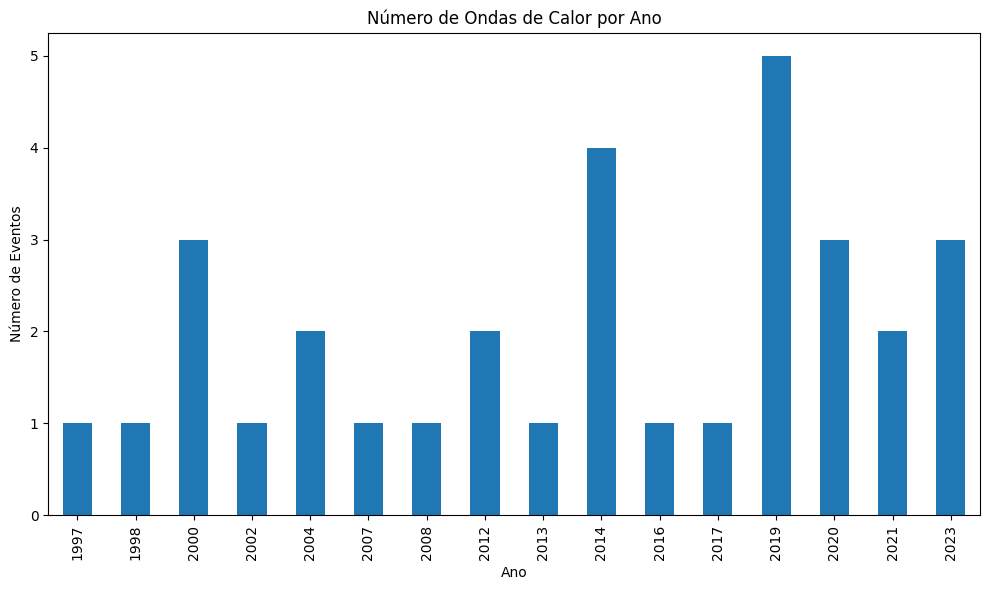

In [18]:
# Converter a lista de eventos para um DataFrame com colunas 'start' e 'end'
heat_df = pd.DataFrame(heat_events, columns=['start', 'end'])

# Extrair o ano de início do evento.
# Se as datas já estiverem no formato datetime.date, usamos pd.to_datetime para garantir a conversão.
heat_df['year'] = pd.to_datetime(heat_df['start']).dt.year

# Agrupar e contar quantos eventos começaram em cada ano
eventos_por_ano = heat_df.groupby('year').size()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
eventos_por_ano.plot(kind='bar')

plt.title('Número de Ondas de Calor por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Eventos')
plt.tight_layout()
plt.show()

# Integração ao dataframe completo

In [19]:
# Inicializa a coluna que vai indicar se é onda de calor (False por padrão)
all_MYs['is_heatwave'] = False

# (Opcional) Se quiser identificar qual evento de onda de calor (ID) ocorreu,
# crie outra coluna e inicialize com zero.
all_MYs['heatwave_event'] = 0

In [20]:
# Já que na detecção de eventos usamos datas (datetime.date), vamos garantir que
# ao comparar, extraímos apenas a data da coluna timeset.
# Caso 'heat_events' seja uma lista de tuplas (start, end) com objetos do tipo datetime.date,
# o código abaixo itera sobre os eventos e marca as linhas correspondentes.
for event_id, (start, end) in enumerate(heat_events, start=1):
    # Cria uma máscara para as linhas cujas datas estejam no intervalo do evento
    mask = (all_MYs['timeset'].dt.date >= start) & (all_MYs['timeset'].dt.date <= end)
    # Marca como onda de calor
    all_MYs.loc[mask, 'is_heatwave'] = True
    # (Opcional) Atribui um ID para o evento, se desejar posterior análise
    all_MYs.loc[mask, 'heatwave_event'] = event_id

In [21]:
# Exemplo de como visualizar as primeiras linhas com as novas colunas
print(all_MYs.head())

      0  1  2  3  4                                                  5     6  \
0  1991  1  1  1  0  ?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...  19.2   
1  1991  1  1  2  0  ?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...  19.0   
2  1991  1  1  3  0  ?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...  19.0   
3  1991  1  1  4  0  ?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9*9?9*9*9?9*9?9...  18.8   
4  1991  1  1  5  0  ?9?9?9?9E0?9?9?9*9*9?9?9?9?9?9?9*9?9*9*9?9*9?9...  18.4   

      7   8      9  ...  28     29  30  31    32   33   34  \
0  16.8  86  89311  ...  47  0.164   0  88  0.17  0.0  0.0   
1  17.0  88  89635  ...  48  0.164   0  88  0.17  0.0  0.0   
2  17.0  88  89635  ...  48  0.164   0  88  0.17  0.0  0.0   
3  16.6  87  89208  ...  46  0.164   0  88  0.17  0.0  0.0   
4  16.8  90  89403  ...  47  0.164   0  88  0.17  0.0  0.0   

              timeset  is_heatwave  heatwave_event  
0 1991-01-01 01:00:00        False               0  
1 1991-01-01 02:00:00        False      

In [22]:
# Exportar para csv
all_MYs.to_csv('all_MYs_heatwaves_ouzeau.csv', index=False)